# A Mini Project Analyzing School Attendance Rates from 2021-2022

## By Lindsay Toothaker and Savannah Dorey

### Data Source

The dataset is downloaded from [Data.gov](https://catalog.data.gov/dataset/school-attendance-by-student-group-and-district-2021-2022). The data was collected from 2021-2022 and updated in 2023. It includes attendance rate data on U.S. public school students by district and student group from PK-12.


In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('s3://ia340-123457/School_Attendance_by_Student_Group_and_District__2021-2022.csv') # load the data from s3
df.head() #show the top 5 rows

Matplotlib is building the font cache; this may take a moment.


,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,91.69,496092.0,92.94,508346.0,94.79,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,83.48,1735.0,81.55,3916.0,88.84,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,88.99,76487.0,89.46,80365.0,92.77,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,88.51,176225.0,88.61,193706.0,93.14,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,91.84,30886.0,92.99,27507.0,95.18,June 2022,07/22/2022


### Data Exploration and Cleaning

In [3]:
df.shape #show the number of rows and columns 

(2019, 12)

In [4]:
df.sort_values(by='Student group') #sort data by a column

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,91.69,496092.0,92.94,508346.0,94.79,June 2022,07/22/2022
1083,1220011,Salisbury School District,NaN,All Students,282,93.95,294.0,96.61,264.0,95.28,June 2022,07/22/2022
308,0360011,Deep River School District,NaN,All Students,206,95.65,215.0,98.03,236.0,96.14,June 2022,07/22/2022
1090,1230011,Scotland School District,NaN,All Students,86,91.28,82.0,95.34,88.0,96.56,June 2022,07/22/2022
1639,2150012,Regional School District 15,NaN,All Students,3502,92.96,3472.0,97.22,3591.0,95.62,June 2022,07/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2140012,Regional School District 14,Race/Ethnicity,White,1342,95.03,1346.0,97.25,1396.0,95.11,June 2022,07/22/2022
1105,1240011,Seymour School District,Race/Ethnicity,White,1383,93.59,1466.0,95.60,1564.0,95.13,June 2022,07/22/2022
442,0490011,Enfield School District,Race/Ethnicity,White,3022,92.89,3111.0,97.63,3250.0,94.82,June 2022,07/22/2022
491,0540011,Glastonbury School District,Race/Ethnicity,White,3742,95.13,3857.0,97.47,3951.0,96.34,June 2022,07/22/2022


In [5]:
df.info() #show the data types and number of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District code                             2019 non-null   object 
 1   District name                             2019 non-null   object 
 2   Category                                  1818 non-null   object 
 3   Student group                             2019 non-null   object 
 4   2021-2022 student count - year to date    2019 non-null   int64  
 5   2021-2022 attendance rate - year to date  2019 non-null   float64
 6   2020-2021 student count                   1963 non-null   float64
 7   2020-2021 attendance rate                 1963 non-null   float64
 8   2019-2020 student count                   1957 non-null   float64
 9   2019-2020 attendance rate                 1957 non-null   float64
 10  Reporting period                    

In [6]:
#rename columns
df= df.rename(columns={"Category": "Need Type", "Student Group": "Student Demographic Group" }) 
df.head()

,District code,District name,Need Type,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,91.69,496092.0,92.94,508346.0,94.79,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,83.48,1735.0,81.55,3916.0,88.84,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,88.99,76487.0,89.46,80365.0,92.77,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,88.51,176225.0,88.61,193706.0,93.14,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,91.84,30886.0,92.99,27507.0,95.18,June 2022,07/22/2022


In [7]:
df.isnull().sum() #show the number of rows containing null value

District code                                 0
District name                                 0
Need Type                                   201
Student group                                 0
2021-2022 student count - year to date        0
2021-2022 attendance rate - year to date      0
2020-2021 student count                      56
2020-2021 attendance rate                    56
2019-2020 student count                      62
2019-2020 attendance rate                    62
Reporting period                              0
Date update                                   0
dtype: int64

In [8]:
df = df.dropna() #drop null values
df.isnull().sum()

District code                               0
District name                               0
Need Type                                   0
Student group                               0
2021-2022 student count - year to date      0
2021-2022 attendance rate - year to date    0
2020-2021 student count                     0
2020-2021 attendance rate                   0
2019-2020 student count                     0
2019-2020 attendance rate                   0
Reporting period                            0
Date update                                 0
dtype: int64

In [9]:
df.describe() #statistical summary of the data

,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,1725.515499,91.735913,1733.994259,92.809736,1815.898393,94.677767
std,12764.355710,2.882934,12878.128483,4.119331,13531.966487,1.559891
min,20.000000,71.520000,20.000000,68.820000,20.000000,81.960000
25%,113.000000,90.490000,116.000000,91.157500,119.000000,93.895000
50%,315.500000,92.200000,311.500000,93.780000,325.000000,94.810000
75%,918.750000,93.770000,913.500000,95.697500,960.500000,95.700000
max,248239.000000,96.930000,251220.000000,98.880000,266736.000000,100.000000


In [10]:
df.to_csv('clean_school_data.csv') #store the cleaned data to local computer

In [11]:
#df.hist(layout=(2,2), figsize=(10, 5), sharey=False, sharex=False, bins=50) #use multiple charts to show the distribution of all columns

### Data Visualization

In [12]:
avg_attendance_by_need_type = df.groupby('Need Type')['2020-2021 attendance rate'].mean() #aggregate the attendance rate per need type
avg_attendance_by_need_type.head()

Need Type
English Learners      92.484107
Free/Reduced Lunch    91.978092
High Needs            94.071256
Homelessness          80.909231
Race/Ethnicity        93.391767
Name: 2020-2021 attendance rate, dtype: float64

<Axes: xlabel='Need Type'>

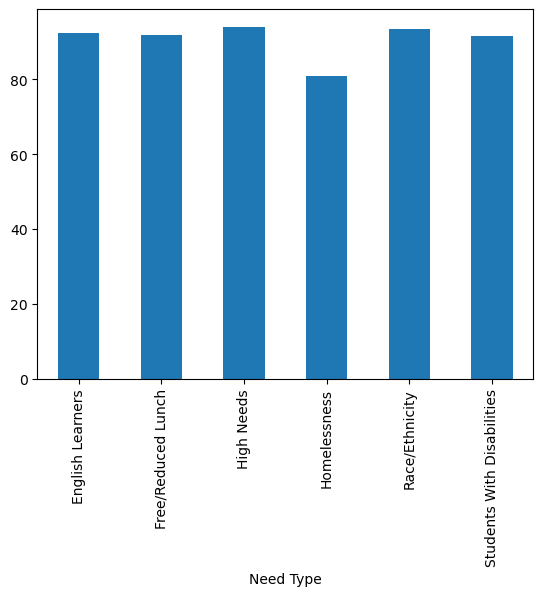

In [13]:
avg_attendance_by_need_type.plot.bar()

In [14]:
avg_attendance_by_district_name = df.groupby('District name')['2020-2021 attendance rate'].mean() #aggregate the attendance rate per district name
avg_attendance_by_district_name.head()

District name
Achievement First Bridgeport Academy District    93.976667
Achievement First Hartford Academy District      90.536667
Amistad Academy District                         93.915556
Andover School District                          95.945000
Ansonia School District                          89.311818
Name: 2020-2021 attendance rate, dtype: float64

<Axes: xlabel='District name'>

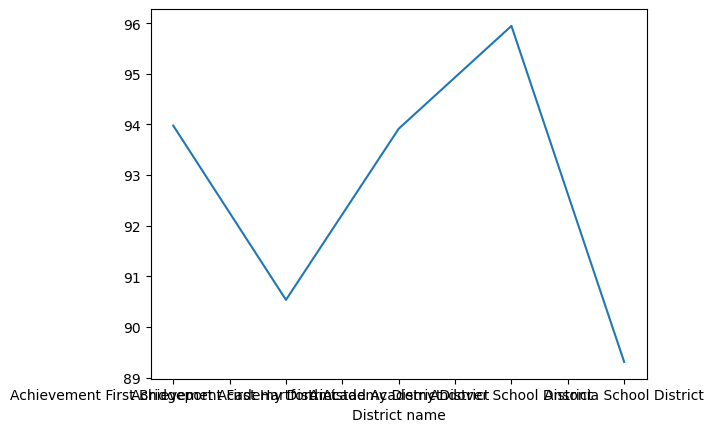

In [15]:
avg_attendance_by_district_name.head().plot()

<Axes: xlabel='District name'>

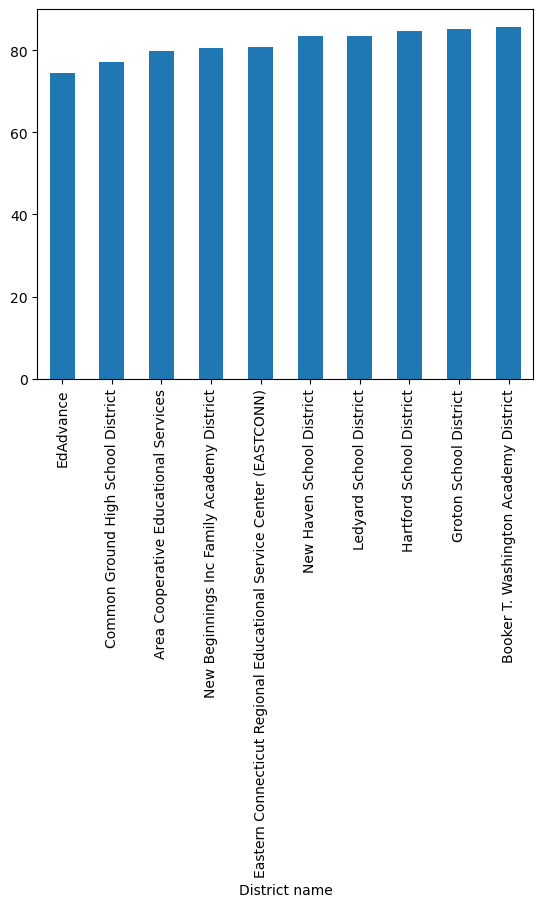

In [16]:
mean_att_rate_by_district = df.groupby('District name')['2020-2021 attendance rate'].mean() # calculate the average attendance rates per district
mean_att_rate_by_district.nsmallest(10).plot.bar() # use a bar chart to show the results of the smallest 10 districts 

In [17]:
#df.plot.scatter(x='district name',y='2020-2021 attendance rate') #use scatter plot to show the result

### Utilizing AI

In [18]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.1 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0

In [19]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [20]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)


In [21]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [22]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [23]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [24]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [26]:
%%ai gpt4
What is in the {df} in {In[10]}

The data frame you mentioned contains the following columns: 

- 'District code': The unique code associated with each district.
- 'District name': The name of the district.
- 'Need Type': The categorization of student needs such as homelessness, students with disabilities, free/reduced lunch.
- 'Student group': The specific group of students under the 'Need Type' such as students experiencing homelessness, students with disabilities, free meal eligible, etc.
- '2021-2022 student count - year to date': The number of students in the district for the academic year 2021-2022 to date.
- '2021-2022 attendance rate - year to date': The attendance rate for the academic year 2021-2022 to date.
- '2020-2021 student count': The number of students in the district for the academic year 2020-2021.
- '2020-2021 attendance rate': The attendance rate for the academic year 2020-2021.
- '2019-2020 student count': The number of students in the district for the academic year 2019-2020.
- '2019-2020 attendance rate': The attendance rate for the academic year 2019-2020.
- 'Reporting period': The period of time for which the data is reported.
- 'Date update': The date when the data was last updated.

The command `df.to_csv('clean_school_data.csv')` is used to write the data frame to a CSV file named 'clean_school_data.csv'.

In [28]:
%%ai gpt4 -f code

Calculate which district had the lowest attendance rate from 2020-2021? 
Which district had the highest?

what are the results?

In [ ]:
# Find the district with the lowest attendance rate in 2020-2021
lowest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].min()]['District name'].iloc[0]

# Find the district with the highest attendance rate in 2020-2021
highest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].max()]['District name'].iloc[0]

print("District with lowest attendance rate (2020-2021): ", lowest_attendance_district)
print("District with highest attendance rate (2020-2021): ", highest_attendance_district)

In [ ]:
# Find the district with the lowest attendance rate in 2020-2021
lowest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].min()]['District name'].iloc[0]

# Find the district with the highest attendance rate in 2020-2021
highest_attendance_district = df[df['2020-2021 attendance rate'] == df['2020-2021 attendance rate'].max()]['District name'].iloc[0]

lowest_attendance_district, highest_attendance_district